In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [41]:
baseline_data = pd.read_csv('Combined Final_withexp BASELINE-table.csv' , skiprows=6)
experiment_data = pd.read_csv('Final ExperimentBASIC-table.csv' , skiprows=6)

In [42]:
baseline_data.head(3)

,[run number],Technology,Separation-at-home,nmbr-weeks-pickup-pmd,general-regionbin-size,number-of-households,nmbr-weeks-pickup-gen,pmd-regionbin-size,[step],recycle-ratio,mean [bin-satisfaction] of households,average-r
0,3,Basic,False,2,100,26,1,200,0,0.0,0.8,1.503846
1,1,Basic,False,2,100,26,1,200,0,0.0,0.8,1.476923
2,4,Basic,False,2,100,26,1,200,0,0.0,0.8,1.534615


In [43]:
baseline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374760 entries, 0 to 374759
Data columns (total 12 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   [run number]                           374760 non-null  int64  
 1   Technology                             374760 non-null  object 
 2   Separation-at-home                     374760 non-null  bool   
 3   nmbr-weeks-pickup-pmd                  374760 non-null  int64  
 4   general-regionbin-size                 374760 non-null  int64  
 5   number-of-households                   374760 non-null  int64  
 6   nmbr-weeks-pickup-gen                  374760 non-null  int64  
 7   pmd-regionbin-size                     374760 non-null  int64  
 8   [step]                                 374760 non-null  int64  
 9   recycle-ratio                          374760 non-null  float64
 10  mean [bin-satisfaction] of households  374760 non-null  

In [44]:
baseline_data.rename(columns={'[run number]':'run_number','[step]':'tick' , 'mean [bin-satisfaction] of households': 'avg bin-satisfaction'}, inplace=True)
experiment_data.rename(columns={'[run number]':'run_number','[step]':'tick' , 'mean [bin-satisfaction] of households': 'avg bin-satisfaction'}, inplace=True)

In [45]:
experiment_data = experiment_data[experiment_data['recycle-ratio'] != 0]

In [46]:
experiment_data_no0 = experiment_data[experiment_data.tick != 0]

In [47]:
experiment_data_no0[experiment_data_no0['recycle-ratio'] == 0]

,run_number,Technology,Separation-at-home,nmbr-weeks-pickup-pmd,general-regionbin-size,number-of-households,nmbr-weeks-pickup-gen,pmd-regionbin-size,tick,avg bin-satisfaction,recycle-ratio,average-r


In [48]:
experiment_data_no0 = experiment_data[experiment_data.tick != 0]

In [49]:
#maximum average waste production ratio of the households
baseline_data['average-r'].max()

1.7461538461538464

In [50]:
#minimum average waste production ratio of the households
baseline_data['average-r'].min()

1.3076923076923077

<AxesSubplot:xlabel='tick', ylabel='avg bin-satisfaction'>

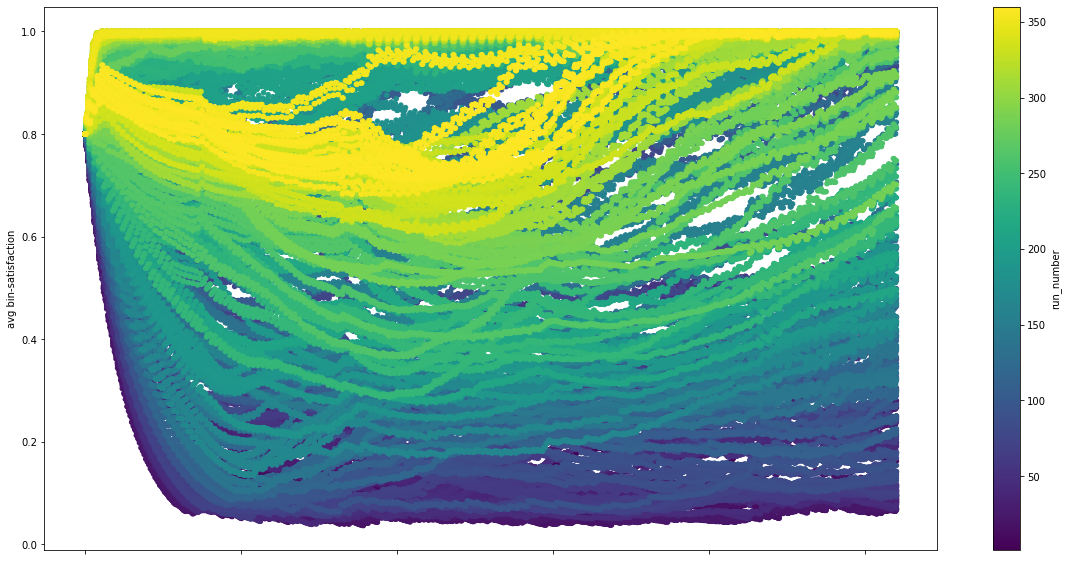

In [51]:
baseline_data.plot.scatter(x='tick',y='avg bin-satisfaction',c='run_number',colormap='viridis',figsize=(20,10))

Text(0.5, 0, 'avg bin-satisfaction')

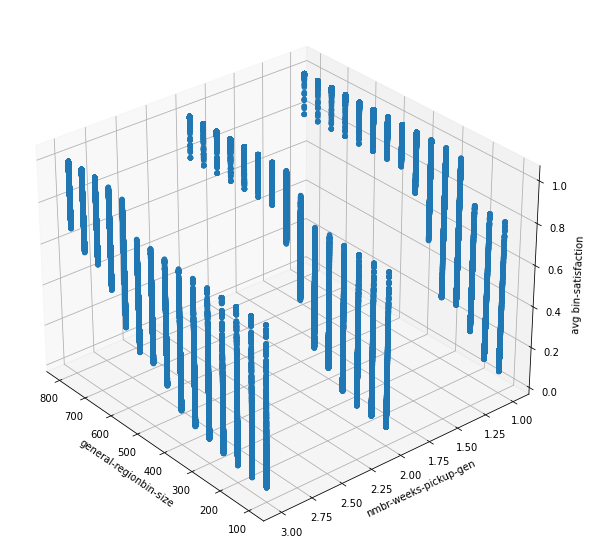

In [52]:
threedp_plot = plt.figure(figsize=(10,10)).gca(projection='3d')
threedp_plot.scatter(baseline_data['general-regionbin-size'],baseline_data['nmbr-weeks-pickup-gen'], baseline_data['avg bin-satisfaction'])
threedp_plot.view_init(30,140)
threedp_plot.set_xlabel('general-regionbin-size')
threedp_plot.set_ylabel('nmbr-weeks-pickup-gen')
threedp_plot.set_zlabel('avg bin-satisfaction')

<AxesSubplot:xlabel='tick', ylabel='avg bin-satisfaction'>

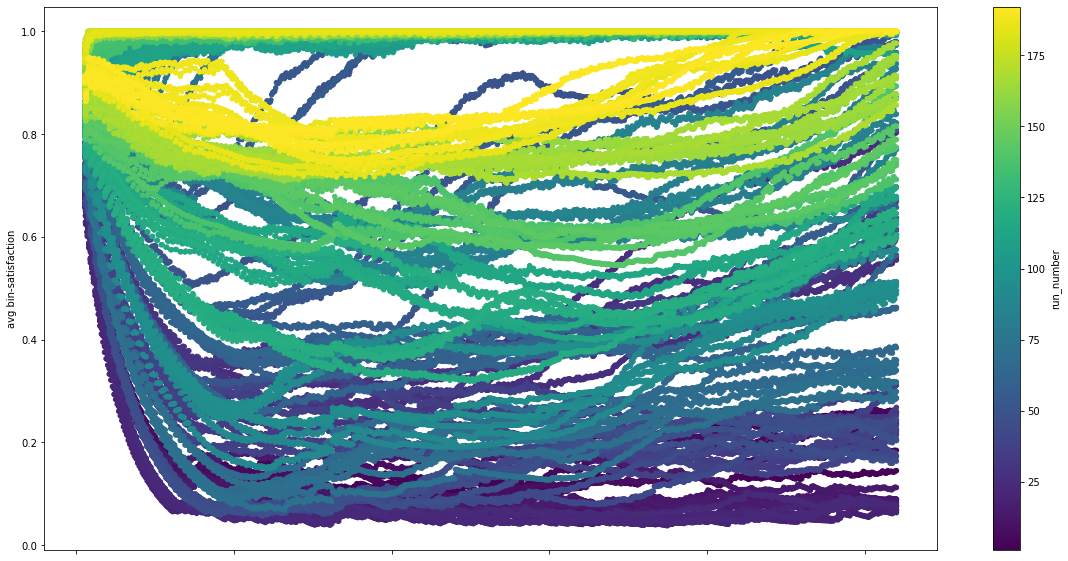

In [53]:
experiment_data.plot.scatter(x='tick',y='avg bin-satisfaction',c='run_number',colormap='viridis',figsize=(20,10))

Text(0.5, 0, 'recycle-ratio')

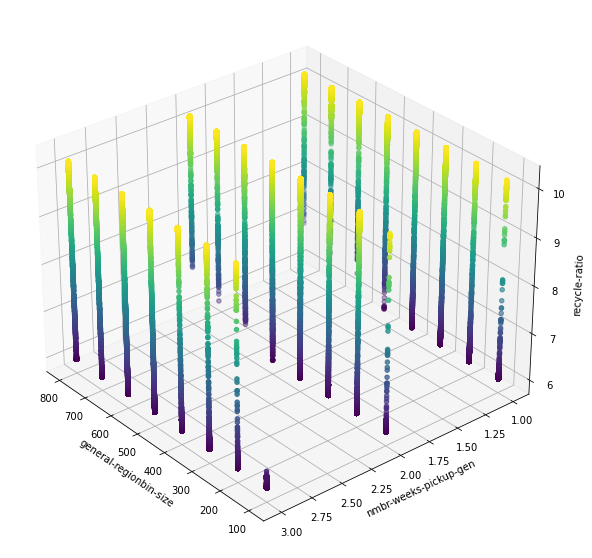

In [54]:
exp_3d_plot = plt.figure(figsize=(10,10)).gca(projection='3d')
exp_3d_plot.scatter(experiment_data['general-regionbin-size'],experiment_data['nmbr-weeks-pickup-gen'], experiment_data['recycle-ratio'], c=experiment_data['recycle-ratio'], cmap='viridis')
exp_3d_plot.view_init(30,140)
exp_3d_plot.set_xlabel('general-regionbin-size')
exp_3d_plot.set_ylabel('nmbr-weeks-pickup-gen')
exp_3d_plot.set_zlabel('recycle-ratio')